# Time Series Modeling with Keras

- ~~Official Tutorial:~~
    - https://www.tensorflow.org/tutorials/structured_data/time_series
    
- Using the TimeSeriesGenerator
    - https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/
    
- Using Tensorflow 2.0's time series methods
    - https://keras.io/api/preprocessing/timeseries/

In [43]:
DOWNLOAD_DATA=False

In [44]:
# !pip install -U fsds
from fsds.imports import *

In [45]:
import requests
import datetime as dt 
import glob,time,os
def download_stock_data(fpath='data/ive_minute_tick_bidask_API.csv',
                       verbose=True,append_date=True):
    """Downloads up-to-date IVE S&P 500 1-min aggregate data from 
    http://www.kibot.com/free_historical_data.aspx
    
    Args:
        fpath (str): csv filepath to save (Default='data/ive_minute_tick_bidask_API.csv')
        verbose (bool): Display file info (Default=True)
        
    Returns:
        stock_df: DataFrame with correct headers and datetime index"""
    agg_url = 'http://api.kibot.com/?action=history&symbol=IVE&interval=tickbidask1&bp=1&user=guest'
    response = requests.get(agg_url,
                            allow_redirects=True)

    ## Save output to csv file
    with open(fpath,'wb') as file:
        file.write(response.content)
        
        
    ## Load in Stock Data Frame with headers (then save)
    headers = ['Date','Time','BidOpen','BidHigh','BidLow','BidClose','AskOpen','AskHigh','AskLow','AskClose']
    stock_df = pd.read_csv(fpath,names=headers)

# 
    ## Make Combined Date Time column and Drop Origs
    stock_df['datetime'] = pd.to_datetime(stock_df['Date'].astype(str)+' '+stock_df['Time'].astype(str))
    
    if append_date:
        suffix = dt.date.today().strftime('%m-%d-%y')
        fpath = f"{fpath.split('.csv')[0]}_{suffix}.csv"
        
    print(f'Saving as {fpath}')
    stock_df.to_csv(fpath,index=False)
        
    if verbose:
        print('[i] Stock data successfully downloaded and saved as:')
        print(' - ',fpath)
        
    return pd.read_csv(fpath,parse_dates=['datetime'],index_col='datetime')

In [46]:
## DOWNLOAD THE DATA IF REQUESTED
if DOWNLOAD_DATA:
    print('[i] Downoading data sets...')
    stock_df = download_stock_data()
    
else: 
    print('[i] Loading most recent data sets...')
    ## Get list of current csvs
    files_glob = glob.glob('data/*.csv')
    stock_files = list(filter(lambda x: 'ive_minute' in x, files_glob))


    ## make dictionaries of file date modifieds
    STOCK_FILES = {}
    for file in stock_files:
        STOCK_FILES[file] = pd.to_datetime(time.ctime(os.path.getmtime(file)))

        
    ## Get most recent files
    recent_stocks = pd.Series(STOCK_FILES).idxmax()
    
    ## Load in the csvs 
    stock_df = pd.read_csv(recent_stocks,parse_dates=['datetime'],index_col='datetime')
    
    ## Sort timeseries
    stock_df.sort_index(inplace=True)
    
## Display Preview of DFs
display(stock_df.head())#,tweets.head())

[i] Loading most recent data sets...


,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
datetime,,,,,,,,,,
2009-09-28 09:30:00,09/28/2009,09:30,39.06,39.06,39.06,39.06,39.13,39.13,39.13,39.13
2009-09-28 09:31:00,09/28/2009,09:31,39.10,39.10,39.08,39.09,39.11,39.11,39.10,39.11
2009-09-28 09:32:00,09/28/2009,09:32,39.11,39.15,39.11,39.15,39.12,39.16,39.12,39.16
2009-09-28 09:33:00,09/28/2009,09:33,39.14,39.14,39.14,39.14,39.15,39.16,39.15,39.15
2009-09-28 09:34:00,09/28/2009,09:34,39.14,39.14,39.12,39.12,39.15,39.15,39.14,39.14


In [47]:
stock_df

,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
datetime,,,,,,,,,,
2009-09-28 09:30:00,09/28/2009,09:30,39.06,39.06,39.06,39.06,39.13,39.13,39.13,39.13
2009-09-28 09:31:00,09/28/2009,09:31,39.10,39.10,39.08,39.09,39.11,39.11,39.10,39.11
2009-09-28 09:32:00,09/28/2009,09:32,39.11,39.15,39.11,39.15,39.12,39.16,39.12,39.16
2009-09-28 09:33:00,09/28/2009,09:33,39.14,39.14,39.14,39.14,39.15,39.16,39.15,39.15
2009-09-28 09:34:00,09/28/2009,09:34,39.14,39.14,39.12,39.12,39.15,39.15,39.14,39.14
...,...,...,...,...,...,...,...,...,...,...
2020-11-11 15:58:00,11/11/2020,15:58,122.06,122.12,122.06,122.12,122.07,122.14,122.07,122.13
2020-11-11 15:59:00,11/11/2020,15:59,122.10,122.11,122.06,122.09,122.12,122.15,122.07,122.13
2020-11-11 16:00:00,11/11/2020,16:00,122.11,122.17,122.11,122.17,122.17,122.42,122.17,122.42


In [48]:
import plotly.express as px

In [49]:
## Make stock_ts from bidclose
stock_ts = stock_df[['BidOpen','BidClose']]#.rename('price')
stock_ts

,BidOpen,BidClose
datetime,,
2009-09-28 09:30:00,39.06,39.06
2009-09-28 09:31:00,39.10,39.09
2009-09-28 09:32:00,39.11,39.15
2009-09-28 09:33:00,39.14,39.14
2009-09-28 09:34:00,39.14,39.12
...,...,...
2020-11-11 15:58:00,122.06,122.12
2020-11-11 15:59:00,122.10,122.09
2020-11-11 16:00:00,122.11,122.17


<AxesSubplot:xlabel='datetime'>

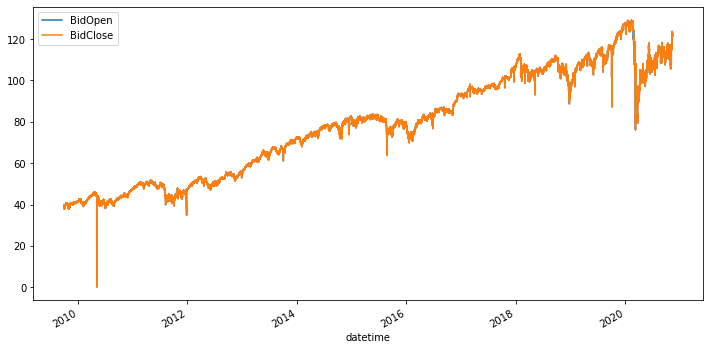

In [50]:
# stock_ts.columns = ['price']
## Replace 0 Values
stock_ts[stock_ts==0] = np.nan
stock_ts = stock_ts.ffill()

## Short time period
# stock_ts = stock_ts.loc['2018':'2019']
stock_ts.plot()

In [51]:
import tensorflow  as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
tf.__version__

'2.3.1'

In [52]:
stock_ts

,BidOpen,BidClose
datetime,,
2009-09-28 09:30:00,39.06,39.06
2009-09-28 09:31:00,39.10,39.09
2009-09-28 09:32:00,39.11,39.15
2009-09-28 09:33:00,39.14,39.14
2009-09-28 09:34:00,39.14,39.12
...,...,...
2020-11-11 15:58:00,122.06,122.12
2020-11-11 15:59:00,122.10,122.09
2020-11-11 16:00:00,122.11,122.17


In [53]:
# train['target'] = train['price'].shift(-1)
# test['target'] = test['price'].shift(-1)

# train

### 11/29/20 Adding technical indicators

In [54]:
stock_ts.index

DatetimeIndex(['2009-09-28 09:30:00', '2009-09-28 09:31:00',
               '2009-09-28 09:32:00', '2009-09-28 09:33:00',
               '2009-09-28 09:34:00', '2009-09-28 09:36:00',
               '2009-09-28 09:37:00', '2009-09-28 09:38:00',
               '2009-09-28 09:40:00', '2009-09-28 09:41:00',
               ...
               '2020-11-11 15:53:00', '2020-11-11 15:54:00',
               '2020-11-11 15:55:00', '2020-11-11 15:56:00',
               '2020-11-11 15:57:00', '2020-11-11 15:58:00',
               '2020-11-11 15:59:00', '2020-11-11 16:00:00',
               '2020-11-11 16:36:00', '2020-11-11 18:12:00'],
              dtype='datetime64[ns]', name='datetime', length=917804, freq=None)

In [55]:
import pandas as pd
def custom_BH_freq():
    return pd.tseries.offsets.CustomBusinessHour(start='09:30',end='16:30')
CBH = custom_BH_freq()
CBH

<CustomBusinessHour: CBH=09:30-16:30>

In [56]:
stocks_B = pd.DataFrame()
stocks_B['BidOpen'] = stock_ts['BidOpen'].resample('B').first()
stocks_B['BidClose'] = stock_ts['BidClose'].resample('B').last()
stocks_B.ffill(inplace=True)
stocks_B

,BidOpen,BidClose
datetime,,
2009-09-28,39.06,39.71
2009-09-29,39.73,39.67
2009-09-30,39.73,39.52
2009-10-01,39.33,38.18
2009-10-02,37.73,38.14
...,...,...
2020-11-05,115.60,114.68
2020-11-06,116.68,116.17
2020-11-09,117.20,118.85


In [57]:
stocks_B.isna().sum()

BidOpen     0
BidClose    0
dtype: int64

In [58]:
stocks_B.index

DatetimeIndex(['2009-09-28', '2009-09-29', '2009-09-30', '2009-10-01',
               '2009-10-02', '2009-10-05', '2009-10-06', '2009-10-07',
               '2009-10-08', '2009-10-09',
               ...
               '2020-10-29', '2020-10-30', '2020-11-02', '2020-11-03',
               '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-09',
               '2020-11-10', '2020-11-11'],
              dtype='datetime64[ns]', name='datetime', length=2903, freq='B')

In [59]:
# def get_day_window_size_from_freq(dataset, CBH=custom_BH_freq()):#, freq='CBH'):
    
#     if dataset.index.freq == CBH: #custom_BH_freq():
#         day_window_size =  7
    
#     elif dataset.index.freq=='T':
#         day_window_size = 60*24
#     elif dataset.index.freq=='BH':
#         day_window_size = 8
#     elif dataset.index.freq=='H':
#         day_window_size =24

#     elif dataset.index.freq=='B':
#         day_window_size=1
#     elif dataset.index.freq=='D':
#         day_window_size=1
        
#     else:
#         raise Exception(f'dataset freq={dataset.index.freq}')
        
#     return day_window_size
    

    

In [60]:
import pandas as pd
import numpy as np

def get_technical_indicators(df, make_price_from='BidClose',n_samples_day=1):
    """Calculates technical indicators for stock data"""
    dataset = pd.DataFrame()
    dataset['price'] =df[make_price_from].copy()
    days = n_samples_day
        
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['price'].rolling(window=7*days).mean()
    dataset['ma21'] = dataset['price'].rolling(window=21*days).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['price'].ewm(span=26*days).mean()
#     dataset['12ema'] = pd.ewma(dataset['price'], span=12)
    dataset['12ema'] = dataset['price'].ewm(span=12*days).mean()

    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
#     dataset['20sd'] = pd.stats.moments.rolling_std(dataset['price'],20)
    dataset['20sd'] = dataset['price'].rolling(20*days).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['price']-days*1
    
    return dataset

In [61]:
stocks_df =get_technical_indicators(stocks_B)
stocks_df#

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
datetime,,,,,,,,,,,
2009-09-28,39.71,NaN,NaN,39.710000,39.710000,0.000000,NaN,NaN,NaN,39.710000,38.71
2009-09-29,39.67,NaN,NaN,39.689231,39.688333,-0.000897,NaN,NaN,NaN,39.680000,38.67
2009-09-30,39.52,NaN,NaN,39.628428,39.622633,-0.005795,NaN,NaN,NaN,39.569231,38.52
2009-10-01,38.18,NaN,NaN,39.223511,39.167250,-0.056261,NaN,NaN,NaN,38.631500,37.18
2009-10-02,38.14,NaN,NaN,38.972240,38.888150,-0.084090,NaN,NaN,NaN,38.302479,37.14
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-05,114.68,111.280000,113.914286,113.102973,112.618228,-0.484745,2.961397,119.837081,107.991491,114.116007,113.68
2020-11-06,116.17,112.225714,113.967143,113.330160,113.164654,-0.165506,2.922848,119.812839,108.121447,115.485336,115.17
2020-11-09,118.85,113.428571,114.057143,113.739037,114.039323,0.300286,3.005694,120.068530,108.045756,117.728445,117.85


In [62]:
stocks_df.index

DatetimeIndex(['2009-09-28', '2009-09-29', '2009-09-30', '2009-10-01',
               '2009-10-02', '2009-10-05', '2009-10-06', '2009-10-07',
               '2009-10-08', '2009-10-09',
               ...
               '2020-10-29', '2020-10-30', '2020-11-02', '2020-11-03',
               '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-09',
               '2020-11-10', '2020-11-11'],
              dtype='datetime64[ns]', name='datetime', length=2903, freq='B')

In [63]:
stocks_df.isna().sum()

price          0
ma7            6
ma21          20
26ema          0
12ema          0
MACD           0
20sd          19
upper_band    20
lower_band    20
ema            0
momentum       0
dtype: int64

<AxesSubplot:>

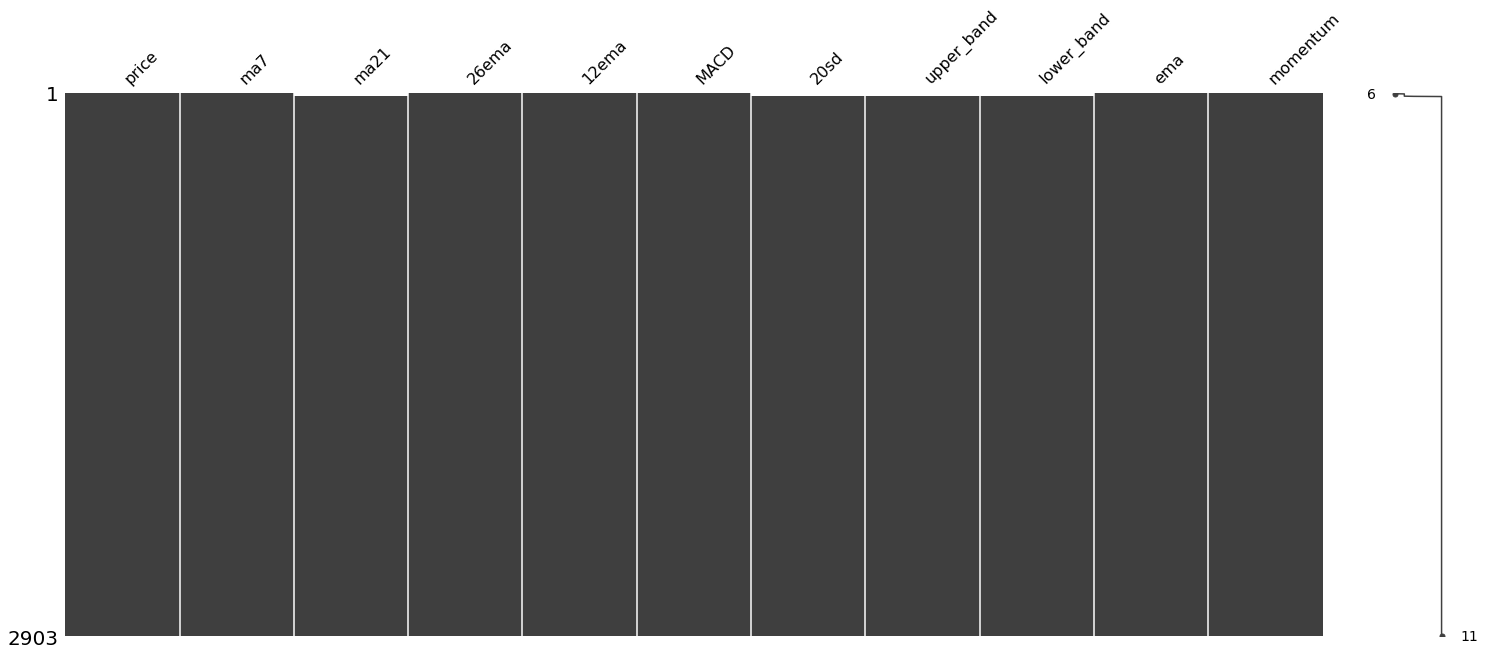

In [64]:
import missingno as ms
ms.matrix(stocks_df)

In [75]:
## REMAKE STOCK_TS
stock_ts = stocks_df.dropna()
stock_ts

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
datetime,,,,,,,,,,,
2009-10-26,39.20,40.122857,39.737619,39.886780,39.958907,0.072126,0.757474,41.252568,38.222670,39.458071,38.20
2009-10-27,39.01,39.921429,39.704286,39.807195,39.809125,0.001930,0.774817,41.253919,38.154652,39.159357,38.01
2009-10-28,38.24,39.574286,39.636190,39.667276,39.562431,-0.104845,0.841024,41.318239,37.954142,38.546452,37.24
2009-10-29,39.18,39.392857,39.620000,39.624424,39.502508,-0.121916,0.776806,41.173612,38.066388,38.968817,38.18
2009-10-30,37.93,39.110000,39.608095,39.477450,39.256811,-0.220639,0.799962,41.208020,38.008171,38.276272,36.93
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-05,114.68,111.280000,113.914286,113.102973,112.618228,-0.484745,2.961397,119.837081,107.991491,114.116007,113.68
2020-11-06,116.17,112.225714,113.967143,113.330160,113.164654,-0.165506,2.922848,119.812839,108.121447,115.485336,115.17
2020-11-09,118.85,113.428571,114.057143,113.739037,114.039323,0.300286,3.005694,120.068530,108.045756,117.728445,117.85


In [76]:
plt.rcParams['figure.figsize'] = 12,6

<AxesSubplot:xlabel='datetime'>

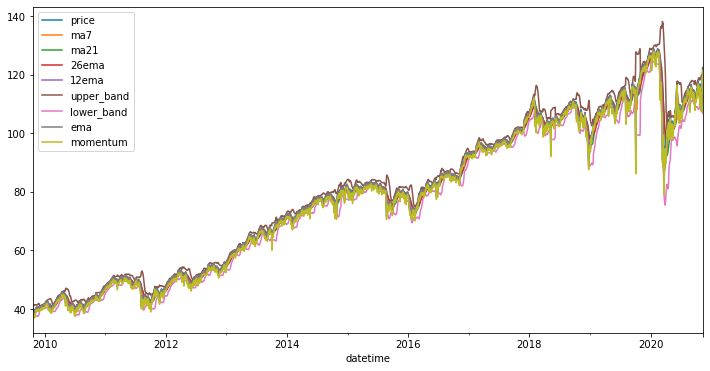

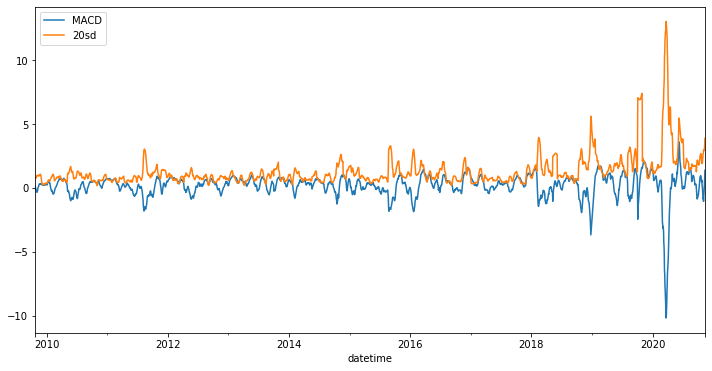

In [77]:
stock_ts.drop(['MACD','20sd'],axis=1).plot()
stock_ts[['MACD','20sd']].plot()

In [78]:
# stock_ts[['upper_band','lower_band']].plot()

### Preparing data [Link](https://www.tensorflow.org/tutorials/structured_data/time_series#split_the_data)

In [110]:
column_indices = {name: i for i, name in enumerate(stock_ts.columns)}

n = len(stock_ts)
train_df = stock_ts[0:int(n*0.7)]
val_df = stock_ts[int(n*0.7):int(n*0.9)]
test_df = stock_ts[int(n*0.9):]

num_features = stock_ts.shape[1]


[print(var.shape[0]) for var in [train_df,val_df,test_df]];

2018
576
289


<AxesSubplot:xlabel='datetime'>

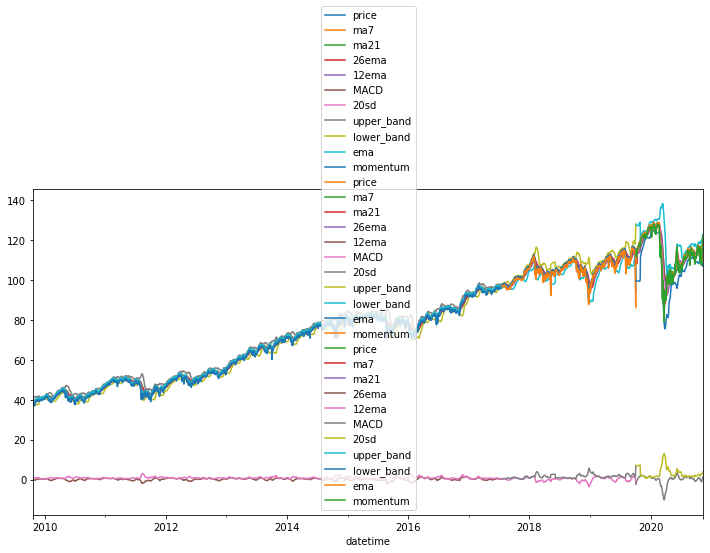

In [111]:
# int_split = round(len(stock_ts)*.8)
# train = stock_ts.iloc[:int_split]
# test = stock_ts.iloc[int_split:]

fig,ax= plt.subplots()

train_df.plot(ax=ax)
val_df.plot(ax=ax)
test_df.plot(ax=ax)

In [86]:
# test.shape

In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_df)#['price'].values.reshape(-1,1))
X_val = scaler.transform(val_df)
X_test = scaler.transform(test_df)#['price'].values.reshape(-1,1))

X_train

array([[0.02115961, 0.02961397, 0.00476198, ..., 0.012689  , 0.02224461,
        0.02115961],
       [0.017994  , 0.02618857, 0.00418125, ..., 0.01152613, 0.01721339,
        0.017994  ],
       [0.00516495, 0.02028521, 0.00299491, ..., 0.00809811, 0.00689026,
        0.00516495],
       ...,
       [0.99066978, 0.99669606, 0.99954371, ..., 0.99965911, 0.99755614,
        0.99066978],
       [0.98683772, 0.99759493, 0.99929483, ..., 0.99917519, 0.99526251,
        0.98683772],
       [0.99500167, 1.        , 1.        , ..., 0.99911723, 1.        ,
        0.99500167]])

In [117]:
X_train.shape, stock_ts.shape

((2018, 11), (2883, 11))

<AxesSubplot:xlabel='datetime'>

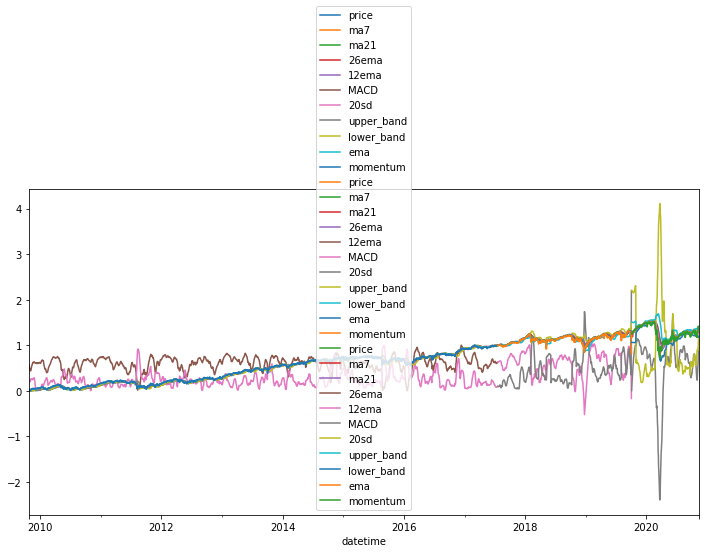

In [118]:
X_train = pd.DataFrame(X_train,index=train_df.index,
                       columns=stock_ts.columns)#['BidOpen','BidClose'])
X_val = pd.DataFrame(X_val,index=val_df.index,
                       columns=stock_ts.columns)
X_test = pd.DataFrame(X_test,index=test_df.index,columns=stock_ts.columns)#['BidOpen','BidClose'])

fig,ax= plt.subplots()
X_train.plot(ax=ax)
X_val.plot(ax=ax)
X_test.plot(ax=ax)

In [119]:
# X_test.describe()
X_train.head()

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
datetime,,,,,,,,,,,
2009-10-26,0.021160,0.029614,0.004762,0.012907,0.019528,0.556807,0.185804,0.003779,0.012689,0.022245,0.021160
2009-10-27,0.017994,0.026189,0.004181,0.011527,0.016959,0.536577,0.191352,0.003802,0.011526,0.017213,0.017994
2009-10-28,0.005165,0.020285,0.002995,0.009101,0.012728,0.505805,0.212533,0.004922,0.008098,0.006890,0.005165
2009-10-29,0.020826,0.017200,0.002713,0.008358,0.011700,0.500885,0.191988,0.002404,0.010017,0.014004,0.020826
2009-10-30,0.000000,0.012390,0.002505,0.005810,0.007486,0.472434,0.199397,0.003003,0.009022,0.002340,0.000000


In [120]:
## Set the number of features in input sequences
n_features = X_train.shape[1]
n_features

11

In [121]:
## Save values as seris
series = X_train.values
print(series.shape)

series = series.reshape((len(series), n_features))
series.shape

(2018, 11)

In [124]:
column_indices

{'price': 0,
 'ma7': 1,
 'ma21': 2,
 '26ema': 3,
 '12ema': 4,
 'MACD': 5,
 '20sd': 6,
 'upper_band': 7,
 'lower_band': 8,
 'ema': 9,
 'momentum': 10}

In [126]:
series

array([[0.02115961, 0.02961397, 0.00476198, ..., 0.012689  , 0.02224461,
        0.02115961],
       [0.017994  , 0.02618857, 0.00418125, ..., 0.01152613, 0.01721339,
        0.017994  ],
       [0.00516495, 0.02028521, 0.00299491, ..., 0.00809811, 0.00689026,
        0.00516495],
       ...,
       [0.99066978, 0.99669606, 0.99954371, ..., 0.99965911, 0.99755614,
        0.99066978],
       [0.98683772, 0.99759493, 0.99929483, ..., 0.99917519, 0.99526251,
        0.98683772],
       [0.99500167, 1.        , 1.        , ..., 0.99911723, 1.        ,
        0.99500167]])

In [134]:
## Specifying the number of timesteps for the sequences
length=5
price_col = column_indices['price']

## Making the time series generator
train_gen = TimeseriesGenerator(series,series[:,price_col],
                                     length,batch_size=64)
train_gen

In [176]:
# ## Testing out an individual outpuyt from timeseries_gen
# ex_X,ex_y =timeseries_gen[1]
# ex_X[1], ex_y[1]

In [132]:
## Making val data
val_series = X_val.values
val_series = val_series.reshape((len(val_series),n_features))
val_gen = TimeseriesGenerator(val_series,val_series[:,price_col],length,batch_size=64)

## Making test data
test_series = X_test.values
test_series = test_series.reshape((len(test_series),n_features))
test_gen = TimeseriesGenerator(test_series,test_series[:,price_col],length,batch_size=64)


In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Bidirectional, Dense, LSTM, Dropout
from tensorflow.keras.regularizers import l2

input_shape=(length,n_features)

# Create model architecture
model1 = Sequential()
model1.add(LSTM(units=50,  activation='relu',
                input_shape =input_shape,return_sequences=False))#,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
# model1.add(LSTM(units=50, activation='relu'))
model1.add(Dense(1))

model1.compile(loss='mse', metrics=['mse'],
              optimizer=optimizers.Adam())

display(model1.summary())
history = model1.fit(train_gen,epochs=10,validation_data=val_gen)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                12400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 12,451
Trainable params: 12,451
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 6.4445e-04 - mse: 6.4445e-04 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 4.8707e-04 - mse: 4.8707e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 4.8474e-04 - mse: 4.8474e-04 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 8.5700e-04 - mse: 8.5700e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 3.3482e-04 - mse: 3.3482e-04 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 3.4297e-04 - mse: 3.4297e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 8/10
32/32 [========================

In [144]:
results= pd.DataFrame(history.history)
results

metrics = ['loss','mse']
for metric in metrics:
    plt.figure()
    plot_cols = [col for col in results.columns if metric in col]
    results[plot_cols].plot()

,loss,mse,val_loss,val_mse
0,0.001758,0.001758,0.003458,0.003458
1,0.000644,0.000644,0.003824,0.003824
2,0.000487,0.000487,0.001476,0.001476
3,0.000485,0.000485,0.006054,0.006054
4,0.000857,0.000857,0.002178,0.002178
5,0.000335,0.000335,0.002448,0.002448
6,0.000343,0.000343,0.001232,0.001232
7,0.000264,0.000264,0.001883,0.001883
8,0.000259,0.000259,0.001260,0.001260
9,0.000327,0.000327,0.001252,0.001252


In [153]:
y_hat_test = model1.predict(test_gen)
y_hat_test.shape

(284, 1)

In [172]:
y_pred = pd.Series(y_hat_test.flatten(),index =X_test.iloc[length:].index)
y_pred

datetime
2019-10-11    1.302145
2019-10-14    1.318602
2019-10-15    1.331447
2019-10-16    1.346753
2019-10-17    1.356990
                ...   
2020-11-05    1.229256
2020-11-06    1.244976
2020-11-09    1.265386
2020-11-10    1.291545
2020-11-11    1.334799
Freq: B, Length: 284, dtype: float32

In [157]:
## Slice out thefirst window length
X_test.iloc[length:].shape

(284, 11)

In [158]:
X_test

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
datetime,,,,,,,,,,,
2019-10-04,1.274242,1.203216,1.292995,1.260729,1.220892,0.000837,2.199910,1.510131,1.061588,1.166851,1.274242
2019-10-07,1.267078,1.199427,1.292986,1.263452,1.231388,0.131925,2.199281,1.510054,1.061647,1.240560,1.267078
2019-10-08,1.239420,1.192309,1.291219,1.263842,1.235888,0.201071,2.195410,1.507867,1.060327,1.246490,1.239420
2019-10-09,1.253416,1.185847,1.289079,1.265281,1.241913,0.278374,2.182186,1.504289,1.059640,1.257899,1.253416
2019-10-10,1.270576,1.185774,1.286988,1.267937,1.249729,0.365554,2.170751,1.500956,1.058810,1.273267,1.270576
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-05,1.278740,1.239681,1.297060,1.282289,1.265758,0.396320,0.890872,1.371736,1.205489,1.279705,1.278740
2020-11-06,1.303565,1.255764,1.297981,1.286227,1.275130,0.488323,0.878540,1.371314,1.207711,1.302769,1.303565
2020-11-09,1.348217,1.276219,1.299549,1.293316,1.290132,0.622562,0.905043,1.375765,1.206417,1.340549,1.348217


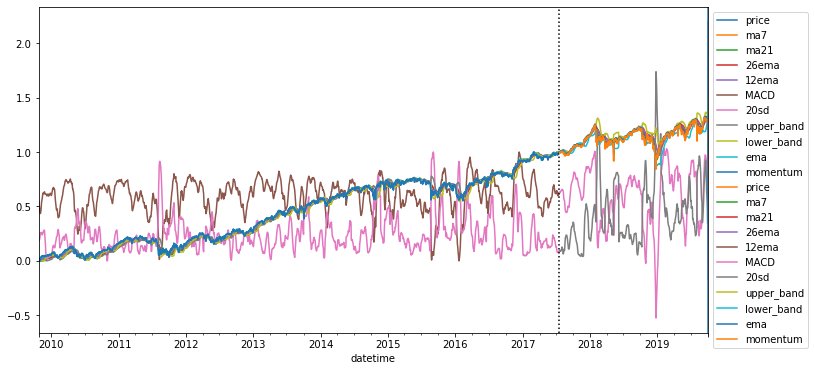

In [166]:
fig,ax = plt.subplots()
X_train.plot(ax=ax)
ax.axvline(X_train.index[-1],color='k',ls=':')
X_val.plot(ax=ax,label='Val')
ax.axvline(X_val.index[-1])
ax.legend(bbox_to_anchor=[1,1])

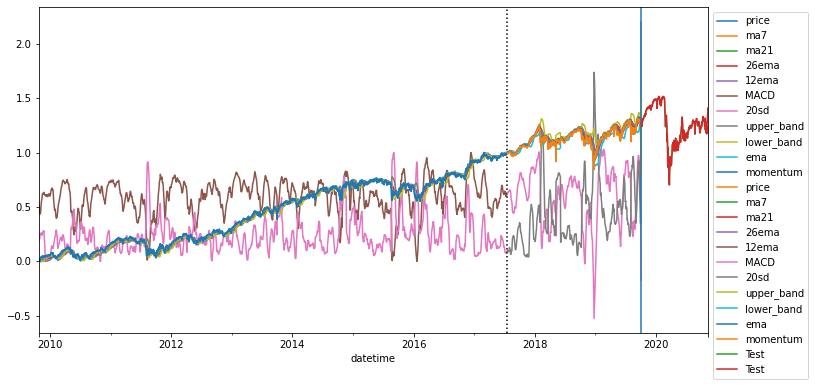

In [168]:
X_test['price'].plot(ax=ax,label='Test')
ax.legend(bbox_to_anchor=[1,1])
fig


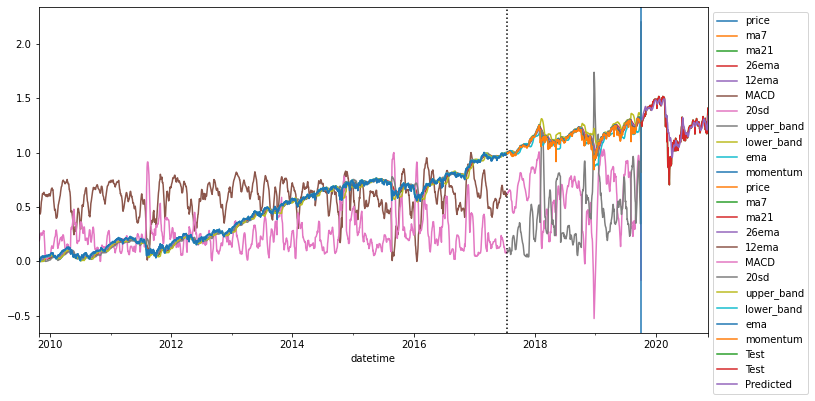

In [173]:
# ax.plot(X_test[length:].index,y_hat_test.flatten(),label='Predicted')
y_pred.plot(ax=ax,label='Predicted')
ax.legend(bbox_to_anchor=[1,1])
fig

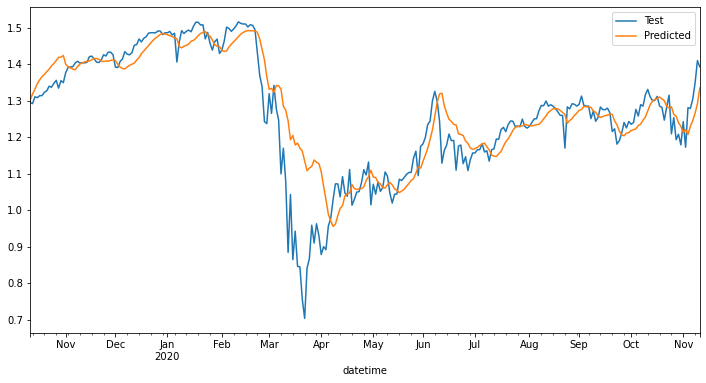

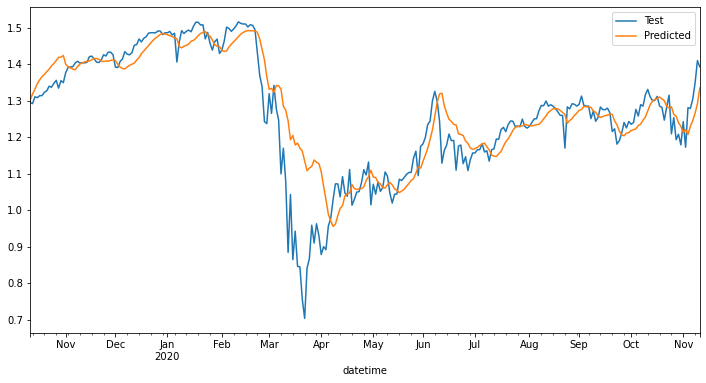

In [175]:
fig,ax = plt.subplots()
X_test.iloc[length:]['price'].plot(ax=ax,label='Test')
y_pred.plot(ax=ax,label='Predicted')
ax.legend(bbox_to_anchor=[1,1])
fig

# Multi In Multi Out

<AxesSubplot:xlabel='datetime'>

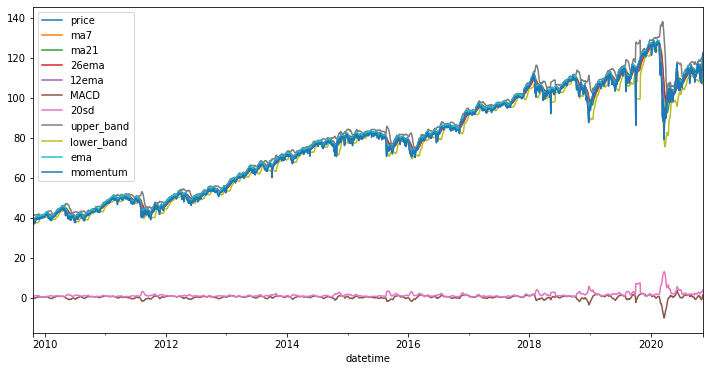

In [179]:
stock_ts.plot()

In [180]:
num_features = stock_ts.shape[1]

column_indices = {name: i for i, name in enumerate(stock_ts.columns)}

n = len(stock_ts)
train_df = stock_ts[0:int(n*0.7)]
val_df = stock_ts[int(n*0.7):int(n*0.9)]
test_df = stock_ts[int(n*0.9):]



[print(var.shape[0]) for var in [train_df,val_df,test_df]];

2018
576
289


In [181]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(train_df),
                       index=train_df.index, columns=stock_ts.columns)
                       
X_val = pd.DataFrame(scaler.transform(val_df),
                         index=val_df.index, columns=stock_ts.columns)

X_test = pd.DataFrame(scaler.transform(test_df),
                          index=test_df.index, columns=stock_ts.columns)

X_train

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
datetime,,,,,,,,,,,
2009-10-26,0.021160,0.029614,0.004762,0.012907,0.019528,0.556807,0.185804,0.003779,0.012689,0.022245,0.021160
2009-10-27,0.017994,0.026189,0.004181,0.011527,0.016959,0.536577,0.191352,0.003802,0.011526,0.017213,0.017994
2009-10-28,0.005165,0.020285,0.002995,0.009101,0.012728,0.505805,0.212533,0.004922,0.008098,0.006890,0.005165
2009-10-29,0.020826,0.017200,0.002713,0.008358,0.011700,0.500885,0.191988,0.002404,0.010017,0.014004,0.020826
2009-10-30,0.000000,0.012390,0.002505,0.005810,0.007486,0.472434,0.199397,0.003003,0.009022,0.002340,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2017-07-13,0.987338,0.994072,0.998772,0.996306,0.995196,0.603943,0.079218,0.985366,0.999524,0.992741,0.987338
2017-07-14,0.991336,0.994364,0.999154,0.997362,0.996743,0.612394,0.086669,0.986558,0.999102,0.996689,0.991336
2017-07-17,0.990670,0.996696,0.999544,0.998288,0.997947,0.617225,0.085034,0.986770,0.999659,0.997556,0.990670


In [185]:
## Specifying the number of timesteps for the sequences
length=5

## Save values as seris
train_series = X_train.values
train_series = series.reshape((len(series), n_features))
train_series.shape

(2018, 11)

In [201]:
## Specifying the number of timesteps for the sequences
length=5
# price_col = column_indices['price']

## Save values as seris
train_series = X_train.values
train_series = series.reshape((len(series), n_features))
train_series.shape

## Making the time series generator
train_gen = TimeseriesGenerator(series,series,#[:,price_col],
                                     length,batch_size=64)

## Making val data
val_series = X_val.values
val_series = val_series.reshape((len(val_series),n_features))
val_gen = TimeseriesGenerator(val_series,val_series,#[:,price_col],
                              length,batch_size=64)

## Making test data
test_series = X_test.values
test_series = test_series.reshape((len(test_series),n_features))
test_gen = TimeseriesGenerator(test_series,test_series,#[:,price_col],
                               length,batch_size=64)

In [203]:
# ## Testing out an individual outpuyt from timeseries_gen
ex_X,ex_y =train_gen[1]
ex_X[1].shape, ex_y[1].shape

((5, 11), (11,))

In [191]:
test_gen.targets.shape

(289, 11)

In [206]:
train_gen.length, train_gen.targets.shape

(5, (2018, 11))

In [212]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Bidirectional, Dense, LSTM, Dropout
from tensorflow.keras.regularizers import l2


length = train_gen.length
n_features = train_gen.targets.shape[1]

input_shape=(length,n_features)#(length,n_features)

# Create model architecture
model1 = Sequential()
model1.add(LSTM(units=50,  activation='relu',
                input_shape =input_shape,return_sequences=False))#,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
# model1.add(LSTM(units=50, activation='relu'))
model1.add(Dense(test_gen.targets.shape[1]))

model1.compile(loss='mse', metrics=['mse'],
              optimizer=optimizers.Adam())

display(model1.summary())
history = model1.fit(train_gen,epochs=10,validation_data=val_gen)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50)                12400     
_________________________________________________________________
dense_6 (Dense)              (None, 11)                561       
Total params: 12,961
Trainable params: 12,961
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/10
32/32 [==============================] - 0s 10ms/step - loss: 0.1498 - mse: 0.1498 - val_loss: 0.2115 - val_mse: 0.2115
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.1106 - val_mse: 0.1106
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0802 - val_mse: 0.0802
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0701 - val_mse: 0.0701
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0029 - mse: 0.0

<Figure size 864x432 with 0 Axes>

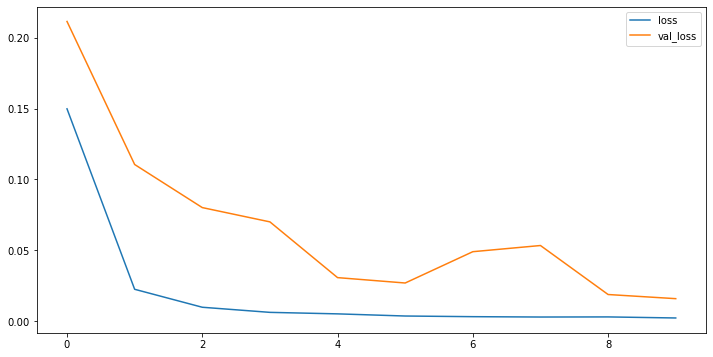

<Figure size 864x432 with 0 Axes>

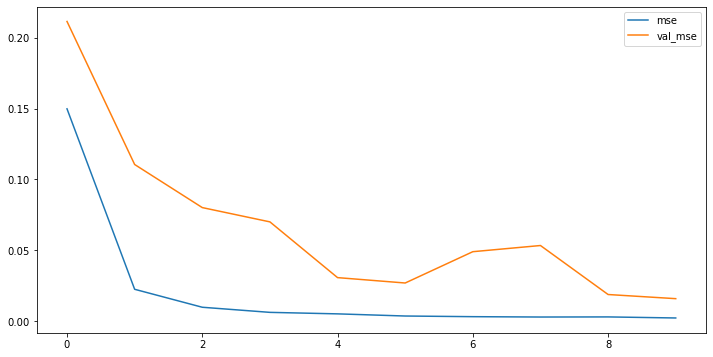

In [213]:
results= pd.DataFrame(history.history)
results

metrics = ['loss','mse']
for metric in metrics:
    plt.figure()
    plot_cols = [col for col in results.columns if metric in col]
    results[plot_cols].plot()

In [218]:
y_hat_test = model1.predict(test_gen)
y_hat_test.shape

(284, 11)

In [219]:
y_pred = pd.DataFrame(y_hat_test, index =X_test.iloc[length:].index,
                      columns=X_test.columns)
y_pred

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
datetime,,,,,,,,,,,
2019-10-11,1.647722,1.294379,1.530649,1.573828,1.635954,0.714967,1.715255,1.770372,1.557336,1.748420,1.476009
2019-10-14,1.683869,1.324626,1.546751,1.580985,1.650569,0.765111,1.733385,1.762784,1.569810,1.772153,1.502273
2019-10-15,1.716624,1.352152,1.560002,1.589734,1.668199,0.818835,1.754526,1.766283,1.583894,1.796122,1.526419
2019-10-16,1.754541,1.383446,1.575288,1.600730,1.688208,0.881801,1.782393,1.768848,1.604934,1.821270,1.557894
2019-10-17,1.786018,1.411526,1.589795,1.617966,1.707185,0.947672,1.807592,1.769067,1.621239,1.843170,1.587131
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-05,1.462465,1.270862,1.368514,1.339779,1.342436,0.561061,0.689321,1.397306,1.493829,1.386108,1.406743
2020-11-06,1.476253,1.277347,1.376487,1.351492,1.358489,0.574208,0.706937,1.412200,1.497669,1.400504,1.411430
2020-11-09,1.500941,1.297178,1.394658,1.372815,1.379977,0.598853,0.718617,1.433202,1.510465,1.423940,1.433628


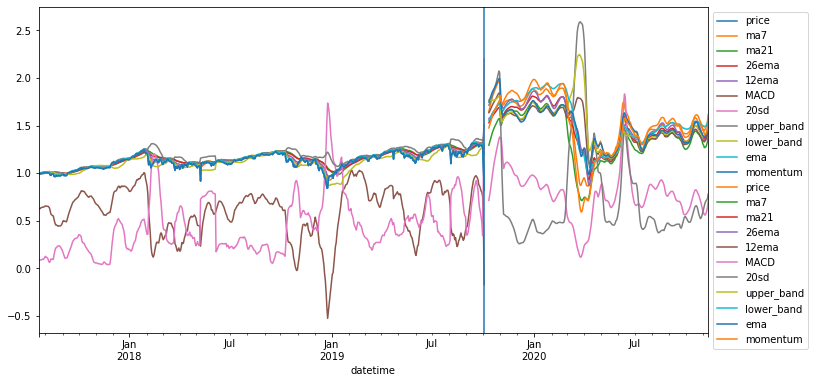

In [224]:
fig,ax = plt.subplots()
# X_train.plot(ax=ax)
# ax.axvline(X_train.index[-1],color='k',ls=':')
X_val.plot(ax=ax,label='Val')
ax.axvline(X_val.index[-1])

y_pred.plot(ax=ax)

ax.legend(bbox_to_anchor=[1,1])


In [215]:
X_test

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
datetime,,,,,,,,,,,
2019-10-04,1.274242,1.203216,1.292995,1.260729,1.220892,0.000837,2.199910,1.510131,1.061588,1.166851,1.274242
2019-10-07,1.267078,1.199427,1.292986,1.263452,1.231388,0.131925,2.199281,1.510054,1.061647,1.240560,1.267078
2019-10-08,1.239420,1.192309,1.291219,1.263842,1.235888,0.201071,2.195410,1.507867,1.060327,1.246490,1.239420
2019-10-09,1.253416,1.185847,1.289079,1.265281,1.241913,0.278374,2.182186,1.504289,1.059640,1.257899,1.253416
2019-10-10,1.270576,1.185774,1.286988,1.267937,1.249729,0.365554,2.170751,1.500956,1.058810,1.273267,1.270576
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-05,1.278740,1.239681,1.297060,1.282289,1.265758,0.396320,0.890872,1.371736,1.205489,1.279705,1.278740
2020-11-06,1.303565,1.255764,1.297981,1.286227,1.275130,0.488323,0.878540,1.371314,1.207711,1.302769,1.303565
2020-11-09,1.348217,1.276219,1.299549,1.293316,1.290132,0.622562,0.905043,1.375765,1.206417,1.340549,1.348217


In [ ]:
X_test['price'].plot(ax=ax,label='Test')
ax.legend(bbox_to_anchor=[1,1])
fig
y_hat_test = model1.predict(test_gen)
y_hat_test.shape

y_pred = pd.Series(y_hat_test.flatten(),index =X_test.iloc[length:].index)
y_pred